In [2]:
 #============================ Energy_space_simulation.py=========================#
# %%    
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

#%% 1) Physical constants 
c    = 2.99792458e8        # m/s
m    = 9.109383e-31        # kg
e    = 1.60217662e-19      # C
hbar = 1.054571800e-34     # J·s
eps0 = 8.854187817e-12     # F/m


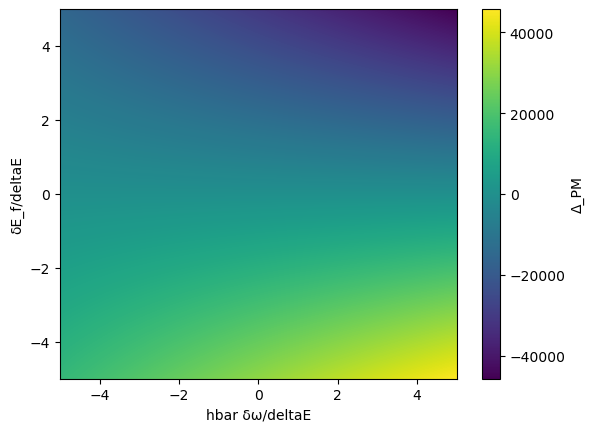

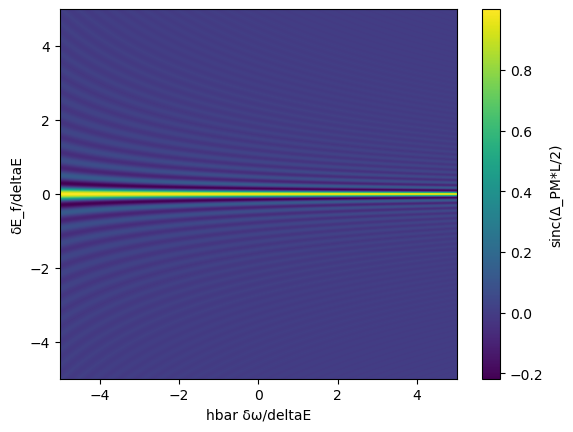

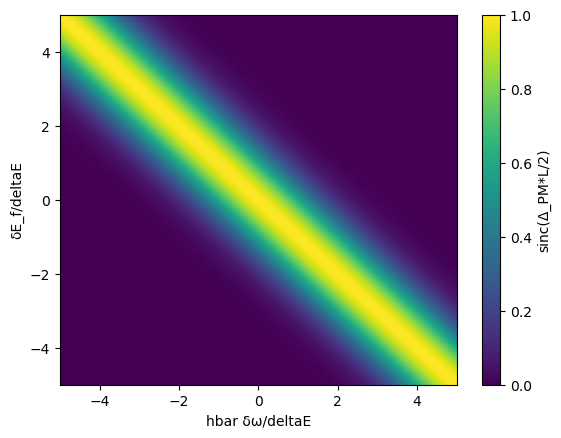

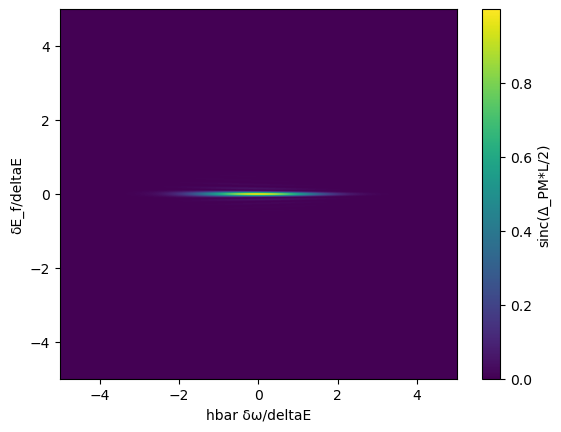

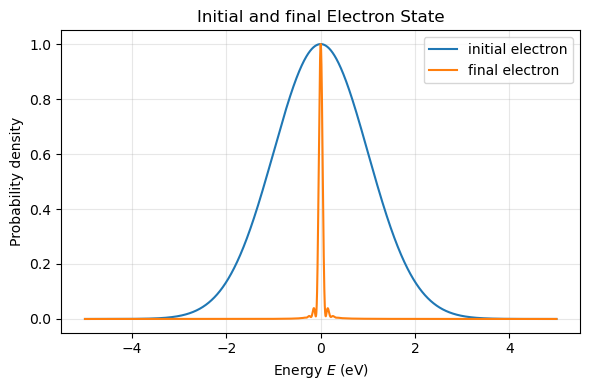

In [97]:


#%% 2) Electron parameters 

v0     = 0.1 * c                    # electron carrier velocity
E0     = 0.5 * m * v0**2             # central electron energy (J)



#%% 3) Photon parameters 
lambda0 = 500e-9                   # central wavelength (m)
omega0  = 2 * np.pi * c / lambda0  # central angular frequency (rad/s)
v_g     = (0.10000 +0.00000)* c                 # photon group velocity (m/s)


deltaE = 0.1 * hbar * omega0                     # energy spread (J)


k0     = np.sqrt(2 * m * E0) / hbar  # central momentum (1/m)
k0_m_hw     = np.sqrt(2 * m * (E0-hbar *omega0)) / hbar
q0 = k0 - k0_m_hw



# From Phase‐matching expansion (approximation) to fit LINEAR dispersion relations:
#q0     =  (k(E0) - k(E0 - hbar*omega0))                     # from Phase matching
recoil = (-1 / (k0 * v0**2))                                  # second‐order term

#
q0_pertubation     =  ((omega0/v0)+(1/(2*k0))*((omega0/v0)**2))  
# Define conversion functions:

def q(δω):
    return q0 + (δω / v_g) + 0.5 * recoil * δω**2
def k(E):
    return np.sqrt(2 * m * E) / hbar




#%% 4) Interaction length and derived quantities
L_int = 1e-2            # interaction length (m)
T     = L_int / v0     # interaction time (s)
lambdaDB = 2 * np.pi  / k0 # de Broglie wavelength (m)
# critical length for cooling (m)
L_critical = lambdaDB*(E0/deltaE)**2  
# Phase mathcing condition:
Δk0 = k(E0 - hbar*omega0) - k(E0) - q(omega0) 

#%% 5) Grids - Energy and frequency  

# for adaptation:
def Energy_from_momentum(k):
    return (hbar * k)**2 / (2 * m)  # Energy from momentum k
N = 2**12
# --- ENERGY GRID
N_E   = N    # number of energy points
#E_min = Energy_from_momentum(0.95 *k0)
#E_max = Energy_from_momentum(1.05 *k0)

E_min = E0 - 5*deltaE
E_max = E0 + 5*deltaE

E_f   = np.linspace(E_min, E_max, N_E)
dE    = E_f[1] - E_f[0]
energy_span = E_max - E_min

δE_f =  E_f - E0



# --- FREQUENCY GRID - CORRECTED
N_ω = N
omega_span = 10 * deltaE / hbar  # Narrow span around ω₀
ω_min = max(omega0 - omega_span/2 , 0*omega0)  # Start from ω₀ - span/2
ω_max = omega0 + omega_span/2   # End at ω₀ + span/2
ω_vec = np.linspace(ω_min, ω_max, N_ω)
dω = ω_vec[1] - ω_vec[0]

δω = ω_vec - omega0

δω_grid, δE_f_grid = np.meshgrid(δω, δE_f)
Delta_PM = k(E0 + δE_f_grid + hbar*δω_grid) - k(E0 + δE_f_grid - hbar*omega0) - q(δω_grid)




# Plot 2D heatmap

plt.imshow(Delta_PM, extent=[hbar*δω.min()/deltaE, hbar*δω.max()/deltaE, δE_f.min()/deltaE, δE_f.max()/deltaE],
           origin='lower', aspect='auto')
plt.xlabel("hbar δω/deltaE")
plt.ylabel("δE_f/deltaE")
plt.colorbar(label="Δ_PM")
plt.show()



plt.imshow(np.sinc(Delta_PM*L_int/2/np.pi), extent=[hbar*δω.min()/deltaE, hbar*δω.max()/deltaE, δE_f.min()/deltaE, δE_f.max()/deltaE],
           origin='lower', aspect='auto')
plt.xlabel("hbar δω/deltaE")
plt.ylabel("δE_f/deltaE")
plt.colorbar(label="sinc(Δ_PM*L/2)")
plt.show()


plt.imshow(np.exp(-(δE_f_grid + hbar*δω_grid)**2/2/deltaE**2), extent=[hbar*δω.min()/deltaE, hbar*δω.max()/deltaE, δE_f.min()/deltaE, δE_f.max()/deltaE],
           origin='lower', aspect='auto')
plt.xlabel("hbar δω/deltaE")
plt.ylabel("δE_f/deltaE")
plt.colorbar(label="sinc(Δ_PM*L/2)")
plt.show()




plt.imshow(np.exp(-(δE_f_grid + hbar*δω_grid)**2/2/deltaE**2)*(np.sinc(Delta_PM*L_int/2/np.pi))**2, extent=[hbar*δω.min()/deltaE, hbar*δω.max()/deltaE, δE_f.min()/deltaE, δE_f.max()/deltaE],
           origin='lower', aspect='auto')
plt.xlabel("hbar δω/deltaE")
plt.ylabel("δE_f/deltaE")
plt.colorbar(label="sinc(Δ_PM*L/2)")
plt.show()

rho_f = np.sum((1/np.sqrt(2*np.pi*deltaE**2))*np.exp(-(δE_f_grid + hbar*δω_grid)**2/2/deltaE**2)*(np.sinc(Delta_PM*L_int/2/np.pi))**2,axis = 1)*dω

rho_f = rho_f / np.max(rho_f)
rho_i = np.exp(-δE_f**2/2/deltaE**2)
plt.figure(figsize=(6,4))


plt.plot(δE_f/deltaE,rho_i,label="initial electron")
plt.plot(δE_f/deltaE,rho_f,label="final electron")

plt.xlabel("Energy $E$ (eV)")
plt.ylabel("Probability density")
plt.title("Initial and final Electron State")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()



In [ ]:
print(60 * "=")
print("Energy and Frequency Grids:") 
print(f"dE                        : {dE/e:.4f} eV")
print(f"Photon energy range (ħω/e): {np.min(hbar * ω_vec / e):.4f} eV to {np.max(hbar * ω_vec / e):.4f} eV")
print(f"dω                        : {dω*hbar/e:.4f} eV")
print(f"Energy grid: {N_E} points ({E_min/e:.4f}–{E_max/e:.4f} eV)")
print(f"Frequency grid: {N_ω} points (ħω: {np.min(hbar * ω_vec / e):.4f}–{np.max(hbar * ω_vec / e):.4f} eV)")
print(60 * "=")

#%% 6) disperssion relation plot
# Plot phase mismatch Δk(ω) as a function of ω
delta_omega = ω_vec - omega0  # small offset to avoid division by zero
Δk_vec = np.array([k(E0 + hbar * ω) - k(E0) - q(ω) for ω in ω_vec])

plt.figure(figsize=(6,4))
plt.plot((hbar * ω_vec) / e, Δk_vec, 'g-', lw=2)
plt.xlabel("Photon energy $ħω$ (eV)")
plt.ylabel("Phase mismatch Δk (1/m)")
plt.title("Phase Mismatch Δk vs. Photon Energy")
plt.grid(True, alpha=0.3)
plt.tight_layout()
#%% 7) Initial electron wavefunction
psi_i_E = (1.0 / ( (np.pi * deltaE**2)**0.25 )) * np.exp( - (E_f - E0)**2 / (2 * deltaE**2) )
# Normalize so ∑ |ψ_i|²  = 1
psi_i_E /= np.sqrt( np.sum(np.abs(psi_i_E)**2)  )

prob_i_E = np.abs(psi_i_E)**2  # |ψ_i(E)|²

# Compute initial FWHM in energy
def compute_FWHM(x, y):
    half = np.max(y) / 2.0
    above = np.where(y >= half)[0]
    if len(above) < 2:
        return 0.0
    return x[above[-1]] - x[above[0]]

initial_width = compute_FWHM(E_f, prob_i_E)

print(f"Initial energy width (FWHM): {initial_width/e:.3f} eV  ({initial_width/E0:.3%} of E0)")
print(f"Central energy E0: {E0/e:.3f} eV")

# Plot initial probability density
plt.figure(figsize=(6,4))
plt.plot(E_f/e, prob_i_E, 'b-', lw=2, label="|ψ_i(E)|²")
plt.xlabel("Energy $E$ (eV)")
plt.ylabel("Probability density")
plt.title(f"Initial Electron State\nWidth = {initial_width/e:.3f} eV")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()



#%% 8) Build Φ(E_f, ω) - VECTORIZED VERSION
# Replace the double loop with efficient matrix operations

# Create meshgrids for all E_f, ω combinations
E_f_mesh, ω_mesh = np.meshgrid(E_f, ω_vec, indexing='ij')  # Shape: (N_E, N_ω)

# Compute all E_i = E_f + ħω at once
E_i_mesh = E_f_mesh + hbar * ω_mesh

# Create mask for valid E_i values (within grid bounds)
valid_mask = (E_i_mesh >= E_min) & (E_i_mesh <= E_max)

# Interpolate ψ_i(E_i) for all valid points at once
psi_i_interp = np.zeros_like(E_i_mesh)
psi_i_interp[valid_mask] = np.interp(E_i_mesh[valid_mask], E_f, psi_i_E)

# Compute phase mismatch for all combinations
Δk_mesh = k(E_i_mesh) - k(E_f_mesh) - q(ω_mesh)

# Compute sinc² values
sinc_arg = (Δk_mesh * L_int) / (2 * np.pi)
sinc_squared = np.sinc(sinc_arg)**2

# Build Φ matrix in one operation
v_Ei_squared = (hbar * k(E_i_mesh) / m)**2
Phi = sinc_squared * psi_i_interp * valid_mask * v_Ei_squared
print(f"Φ matrix built with shape: {Phi.shape}")
print(f"Number of valid grid points: {np.sum(valid_mask)} / {valid_mask.size}")
#%% 9) Build ρ_f(E_f, E_f') = Φ · Φ† · dω , then extract diagonal
#    
ρ_f_matrix = Phi.dot(Phi.conj().T) *dω

# Probability density at E_f is the diagonal of ρ_f:
prob_f_E = np.real(np.diag(ρ_f_matrix)).copy()
# Normalize so ∑ prob_f_E·dE = 1
if np.sum(prob_f_E) > 0:
    prob_f_E /= ( np.sum(prob_f_E) )

# Compute final FWHM
final_width = compute_FWHM(E_f, prob_f_E)

# Find peak positions for initial and final distributions
initial_peak_idx = np.argmax(prob_i_E)
final_peak_idx = np.argmax(prob_f_E)
initial_peak_E = E_f[initial_peak_idx]
final_peak_E = E_f[final_peak_idx]
peak_shift = (final_peak_E - initial_peak_E)
peak_shift_eV = peak_shift / e  # Convert to eV


#%% 10) Plot initial vs final distributions
plt.figure(figsize=(6,4))
plt.plot(E_f/e, prob_i_E, 'b--', lw=2, label="Initial |ψ_i(E)|²")
plt.plot(E_f/e, prob_f_E, 'r-', lw=2, label="Final ρ(E)")
plt.xlabel("Energy $E$ (eV)")
plt.ylabel("Probability density")
plt.title("Electron Energy Distributions\nInitial vs. Final")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()


#%% 11) Photon‐frequency (“photon wavefunction”) distribution
# Sum over all E_f: photon probability ∝ ∑ |Φ(E_f, ω)|²
photon_prob_ω = np.sum(np.abs(Phi)**2, axis=0)
if np.sum(photon_prob_ω) > 0:
    photon_prob_ω /= ( np.sum(photon_prob_ω)  )

# Convert ω → photon‐energy in eV:  E_γ = ħ·ω / e
photon_energy_eV = (hbar * ω_vec) / e

plt.figure(figsize=(6,4))
plt.plot(photon_energy_eV, photon_prob_ω, 'm-', lw=2)
plt.xlabel("Photon energy $ħω$ (eV)")
plt.ylabel("Probability density")
plt.title("Photon Energy Distribution")
plt.grid(True, alpha=0.3)
# Zoom: show ±0.5 eV around ħω₀
center_eV = hbar * omega0 / e
plt.xlim(center_eV - 0.5, center_eV + 0.5)
plt.tight_layout()
# Compute and print the photon energy at which the photon probability is maximal
max_idx = np.argmax(photon_prob_ω)
max_photon_energy = photon_energy_eV[max_idx]
#%% 12) Final summary print

print("\n" + "="*50)

print(" SIMULATION SUMMARY ".center(50, "="))
print(f"Peak shift:              {peak_shift_eV:.4e} eV")
print(f"Central electron energy: {E0/e:.2e} eV")
print(f"Energy spread ΔE:        {deltaE/e:.2e} eV  ({deltaE/E0:.1%} of E0)")
print(f"Interaction length L:    {L_int*1e3:.2f} mm")
print(f"Critical length :        {L_critical*1e9:.2f} nm")
print(f"Initial FWHM:            {initial_width/e:.4e} eV  ({initial_width/E0:.4e} E0)")
print(f"Final   FWHM:            {final_width/e:.4e} eV  ({final_width/E0:.4e} E0)")
print(f"photon central energy:   {max_photon_energy:.4f} eV")
print("="*50 + "\n")

#%% 13) Width vs. Interaction‐Length scan 
def compute_width_for_L(L_test, E_f_mesh, ω_mesh, E_i_mesh, valid_mask, psi_i_interp, Δk_mesh):
    """Compute final width for a given interaction length L_test"""
    # Only the sinc function depends on L, everything else is precomputed
    sinc_arg = (Δk_mesh * L_test) / (2 * np.pi)
    sinc_squared = np.sinc(sinc_arg)**2
    
    # Build Φ matrix
    Phi_test = sinc_squared * psi_i_interp * valid_mask
    
    # Compute final probability distribution
    prob_f_E = np.trapz(np.abs(Phi_test)**2, ω_vec, axis=1)
    
    # Normalize
    if np.trapz(prob_f_E, E_f) > 0:
        prob_f_E /= np.trapz(prob_f_E, E_f)
    
    # Compute FWHM
    return compute_FWHM(E_f, prob_f_E)

# Setup interaction length scan
L_min = lambdaDB / 100        # Very short interaction
L_max = 10 * L_critical       # Well beyond critical length
N_L = 20                      # Number of points
L_vec = np.logspace(np.log10(L_min), np.log10(L_max), N_L)  # Logarithmic spacing

print(f"Scanning {N_L} interaction lengths from {L_min*1e6:.1f} μm to {L_max*1e3:.1f} mm")
print(f"Critical length: {L_critical*1e6:.1f} μm")

# PRE-COMPUTE all quantities that don't depend on L (MAJOR SPEEDUP!)
print("Pre-computing meshgrids and phase mismatch...")
E_f_mesh, ω_mesh = np.meshgrid(E_f, ω_vec, indexing='ij')
E_i_mesh = E_f_mesh + hbar * ω_mesh
valid_mask = (E_i_mesh >= E_min) & (E_i_mesh <= E_max)

# Pre-interpolate ψ_i for all valid points
psi_i_interp = np.zeros_like(E_i_mesh)
psi_i_interp[valid_mask] = np.interp(E_i_mesh[valid_mask], E_f, psi_i_E)

# Pre-compute phase mismatch (independent of L)
Δk_mesh = k(E_i_mesh) - k(E_f_mesh) - q(ω_mesh)

# Perform the scan
widths_eV = []
cooling_efficiency = []  # Track cooling efficiency

print("Performing interaction length scan...")
for i, L_test in enumerate(tqdm(L_vec, desc="L scan")):
    width_test = compute_width_for_L(L_test, E_f_mesh, ω_mesh, E_i_mesh, 
                                   valid_mask, psi_i_interp, Δk_mesh)
    widths_eV.append(width_test / e)
    
    # Cooling efficiency: how much narrower than initial
    efficiency = initial_width / width_test if width_test > 0 else 0
    cooling_efficiency.append(efficiency)

# Convert to arrays for easier manipulation
L_vec_um = L_vec * 1e6  # Convert to micrometers for plotting
L_critical_um = L_critical * 1e6
widths_eV = np.array(widths_eV)
cooling_efficiency = np.array(cooling_efficiency)

# Create comprehensive plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Width vs Length (linear scale)
ax1.plot(L_vec_um, widths_eV, 'ko-', lw=2, markersize=4)
ax1.axhline(y=initial_width/e, color='b', linestyle='--', alpha=0.7, label="Initial width")
ax1.axvline(x=L_critical_um, color='r', linestyle='--', alpha=0.7, label=f"Critical length ({L_critical_um:.1f} μm)")
ax1.set_xlabel("Interaction length L (μm)")
ax1.set_ylabel("Final FWHM (eV)")
ax1.set_title("Final Width vs. Interaction Length")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Width vs Length (log scale for better visualization)
ax2.loglog(L_vec_um, widths_eV, 'ko-', lw=2, markersize=4)
ax2.axhline(y=initial_width/e, color='b', linestyle='--', alpha=0.7, label="Initial width")
ax2.axvline(x=L_critical_um, color='r', linestyle='--', alpha=0.7, label="Critical length")
ax2.set_xlabel("Interaction length L (μm)")
ax2.set_ylabel("Final FWHM (eV)")
ax2.set_title("Final Width vs. Length (Log-Log)")
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: Cooling efficiency
ax3.semilogx(L_vec_um, cooling_efficiency, 'go-', lw=2, markersize=4)
ax3.axvline(x=L_critical_um, color='r', linestyle='--', alpha=0.7, label="Critical length")
ax3.axhline(y=1, color='gray', linestyle=':', alpha=0.7, label="No cooling")
ax3.set_xlabel("Interaction length L (μm)")
ax3.set_ylabel("Cooling factor (Initial width / Final width)")
ax3.set_title("Cooling Efficiency vs. Length")
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Normalized width (easier to see cooling regimes)
normalized_width = widths_eV / (initial_width/e)
ax4.loglog(L_vec_um, normalized_width, 'mo-', lw=2, markersize=4)
ax4.axhline(y=1, color='gray', linestyle=':', alpha=0.7, label="No change")
ax4.axvline(x=L_critical_um, color='r', linestyle='--', alpha=0.7, label="Critical length")
ax4.set_xlabel("Interaction length L (μm)")
ax4.set_ylabel("Normalized width (Final/Initial)")
ax4.set_title("Normalized Width vs. Length")
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

# Find optimal interaction length (minimum width)
min_idx = np.argmin(widths_eV)
optimal_L = L_vec[min_idx]
min_width = widths_eV[min_idx]
max_cooling = cooling_efficiency[min_idx]

# Analysis and summary
print("\n" + "="*60)
print(" WIDTH vs LENGTH ANALYSIS ".center(60, "="))
print(f"Initial width:              {initial_width/e:.4f} eV")
print(f"Critical length:            {L_critical_um:.1f} μm")
print(f"Current sim length:         {L_int*1e6:.1f} μm")
print("-" * 60)
print(f"Optimal interaction length: {optimal_L*1e6:.1f} μm")
print(f"Minimum achievable width:   {min_width:.4f} eV")
print(f"Maximum cooling factor:     {max_cooling:.1f}×")
print(f"Optimal L / Critical L:     {optimal_L/L_critical:.2f}")
print("-" * 60)

# Identify cooling regimes
short_regime = L_vec_um < L_critical_um/10
optimal_regime = (L_vec_um >= L_critical_um/10) & (L_vec_um <= L_critical_um*10)
long_regime = L_vec_um > L_critical_um*10

if np.any(short_regime):
    print(f"Short interaction regime (<{L_critical_um/10:.1f} μm): Limited cooling")
if np.any(optimal_regime):
    print(f"Optimal regime ({L_critical_um/10:.1f}-{L_critical_um*10:.1f} μm): Best cooling")
if np.any(long_regime):
    print(f"Long interaction regime (>{L_critical_um*10:.1f} μm): Diminishing returns")

print("="*60 + "\n")

# Save results for further analysis if needed
scan_results = {
    'L_vec_um': L_vec_um,
    'widths_eV': widths_eV,
    'cooling_efficiency': cooling_efficiency,
    'optimal_L_um': optimal_L*1e6,
    'min_width_eV': min_width,
    'max_cooling_factor': max_cooling
}

print("Scan completed! Use 'scan_results' dictionary to access all data.")


